In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from importlib import reload
import base
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers
import cvae_tfp
tf.keras.backend.set_floatx('float32')

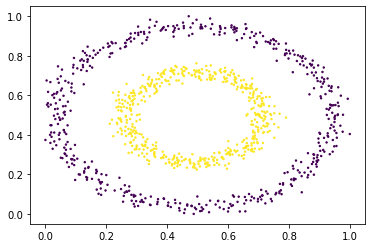

In [2]:
data, conditions = make_circles(n_samples=1000, noise=0.05, factor=0.5)
data = np.float32(data)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()
data = utils.as_float_array(data)
data_cond = utils.as_float_array(conditions)
data_cond = data_cond.reshape(-1, 1)

## Normal

In [11]:
reload(cvae_tfp)
data_dim = 2
cond_dim = 1
latent_dim = 4
hidden_dim = 50
x_input = [data, data_cond]
encoder = cvae_tfp.Encoder(data_dim, cond_dim, latent_dim, hidden_dim)
sampler = cvae_tfp.NormalSampler(latent_dim)
encodersampler = cvae_tfp.EncoderSampler(encoder,sampler)
decoder = cvae_tfp.Decoder(data_dim, cond_dim, latent_dim, hidden_dim)
weight = 0.02
model_normal = cvae_tfp.CVAE_circle(data_dim, cond_dim, latent_dim, hidden_dim, weight, decoder, encodersampler)
def zero_error(y_true, y_pred):
    return tf.constant(0., dtype='float32')
model_normal.compile(optimizer='adam', loss=zero_error)
model_normal.evaluate(x = x_input, y = x_input[0])

32/32 [==============================] - 0s 959us/step - loss: 0.1488


0.14902101457118988

In [12]:
model_normal.fit(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)), epochs=5000,\
                 batch_size=data.shape[0], verbose = True)

Epoch 1/5000
1/1 [==============================] - 1s 948ms/step - loss: 0.1459
Epoch 2/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1404
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1440
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1421
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1399
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1427
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1400
Epoch 8/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1373
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1362
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1362
Epoch 11/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1370
Epoch 12/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1348
Epoch 13/5000
1/1 [============================

1/1 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 205/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0760
Epoch 206/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0791
Epoch 207/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0804
Epoch 208/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0824
Epoch 209/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0785
Epoch 210/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0791
Epoch 211/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0771
Epoch 212/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0774
Epoch 213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0768
Epoch 214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0633
Epoch 407/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0647
Epoch 408/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0614
Epoch 409/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0627
Epoch 410/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0628
Epoch 411/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0624
Epoch 412/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0632
Epoch 413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0614
Epoch 414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0632
Epoch 416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0632
Epoch 417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 418/5000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0587
Epoch 609/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0577
Epoch 610/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0573
Epoch 611/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0581
Epoch 612/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0575
Epoch 613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0577
Epoch 614/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0578
Epoch 615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0581
Epoch 616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0578
Epoch 617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0565
Epoch 618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0577
Epoch 619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0583
Epoch 620/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0544
Epoch 811/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 812/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0557
Epoch 813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0548
Epoch 818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0545
Epoch 819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0547
Epoch 820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0550
Epoch 822/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 1013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 1014/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 1015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0528
Epoch 1016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 1017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 1018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 1019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 1020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 1021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 1022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 1023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0525
Epoch 1024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 1113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 1114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 1115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0524
Epoch 1116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 1117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 1118/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 1119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0528
Epoch 1120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 1121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 1122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 1123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 1124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 1213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 1214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 1215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 1216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 1217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 1218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 1219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 1220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 1221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 1222/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0518
Epoch 1223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 1224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 1313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 1314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 1315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 1316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 1317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 1318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 1319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 1320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 1321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 1322/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0516
Epoch 1323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0516
Epoch 1324/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 1413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 1414/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 1415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 1416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 1417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 1418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 1419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 1420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 1421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 1422/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 1423/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 1424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 1513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 1514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 1515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 1516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 1517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 1518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 1519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 1520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 1521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 1522/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 1523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 1524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 1613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 1614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 1615/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0499
Epoch 1616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 1617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 1618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 1619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 1620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 1621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 1622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 1623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 1624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 1714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 1715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 1716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 1717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 1718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 1720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 1721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 1722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 1723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 1724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 1813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 1814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 1815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 1816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 1817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 1818/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 1819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 1820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 1821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 1822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 1823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 1824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 1913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 1914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 1915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 1916/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0502
Epoch 1917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 1918/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0496
Epoch 1919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 1920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 1921/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0498
Epoch 1922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 1923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 1924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 2013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 2014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2015/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 2016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 2017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 2018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 2019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 2020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 2021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 2022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 2023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 2024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 2113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 2115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 2116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 2117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 2119/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 2120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0493
Epoch 2121/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 2122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 2123/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 2124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 2214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 2215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 2216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 2218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 2219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2220/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 2221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 2222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0493
Epoch 2223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 2224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 2315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 2316/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 2317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 2318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 2319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 2320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 2321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 2322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 2323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 2324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 2413/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 2414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 2415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 2416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 2417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 2418/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 2419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 2420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 2421/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 2422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 2423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 2424/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 2513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 2514/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 2515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 2516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 2517/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 2518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 2519/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 2520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 2521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 2522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 2523/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0488
Epoch 2524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 2613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 2614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 2615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 2616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 2617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 2618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 2619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 2620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 2621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 2622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 2623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 2624/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 2713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 2714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 2715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 2716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 2717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 2718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 2719/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 2720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 2721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 2722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 2723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 2724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 2813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 2814/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 2815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 2816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 2817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 2818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 2819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 2820/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 2821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 2822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0486
Epoch 2823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 2824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 2913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 2914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 2915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 2916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 2917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 2918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 2919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 2920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0478
Epoch 2921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 2922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 2923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 2924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0490
Epoch 3013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 3016/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 3017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 3020/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 3021/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3022/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 3023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3113/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 3114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3115/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3117/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 3118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 3119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 3120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3121/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0483
Epoch 3122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0487
Epoch 3123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 3124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 3213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 3214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 3216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 3217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 3219/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 3220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 3221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 3222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 3313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 3317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 3318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 3319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0486
Epoch 3321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0493
Epoch 3322/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3323/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 3324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 3414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 3415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 3418/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 3420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 3421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 3422/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 3423/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 3424/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 3513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 3514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 3515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0484
Epoch 3516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 3517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 3519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 3520/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 3521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 3522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0477
Epoch 3524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 3615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 3617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 3618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 3619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 3620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 3621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 3623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 3624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 3713/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 3714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 3715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3716/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 3717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0476
Epoch 3719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0478
Epoch 3720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 3721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 3722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3723/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 3724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 3813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 3814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 3815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0478
Epoch 3816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 3817/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 3818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0487
Epoch 3820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 3821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 3822/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 3823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 3824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 3913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 3914/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0481
Epoch 3915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 3916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 3917/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0478
Epoch 3918/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 3919/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 3920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 3922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 3923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 3924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 4014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4015/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 4016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 4017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 4018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 4019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 4020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 4021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 4023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 4024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 4115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 4117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0483
Epoch 4118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 4119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4124/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 4213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 4214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 4215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 4219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0484
Epoch 4221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 4223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 4313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 4318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0470
Epoch 4320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 4322/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 4413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4414/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0481
Epoch 4415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4417/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 4418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 4419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 4420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4422/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 4423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4424/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 4513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0470
Epoch 4514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 4516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 4519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0477
Epoch 4521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 4522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 4523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 4615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 4616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 4617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 4618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 4621/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0475
Epoch 4622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 4623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 4714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 4717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 4718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 4720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 4724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0476
Epoch 4813/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 4814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 4816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474
Epoch 4817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 4818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 4820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0473
Epoch 4821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 4822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 4824/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 4913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 4914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 4916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0472
Epoch 4917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471
Epoch 4919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0480
Epoch 4920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0474
Epoch 4921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 4922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 4923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 4924/5000
1/1 [===========

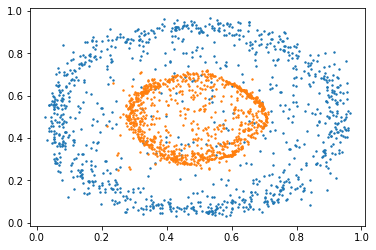

In [13]:
model_normal.visualize()

## Student

In [28]:
reload(cvae_tfp)
data_dim = 2
cond_dim = 1
latent_dim = 4
hidden_dim = 50
x_input = [data, data_cond]
encoder = cvae_tfp.Encoder_Pseudo(data_dim, cond_dim, latent_dim, hidden_dim)
sampler = cvae_tfp.StudentSampler(latent_dim)
encodersampler = cvae_tfp.EncoderSampler(encoder,sampler)
decoder = cvae_tfp.Decoder(data_dim, cond_dim, latent_dim, hidden_dim)
weight = 0.02
model_student = cvae_tfp.CVAE_circle(data_dim, cond_dim, latent_dim, hidden_dim, weight, decoder, encodersampler)
def zero_error(y_true, y_pred):
    return tf.constant(0., dtype='float32')
model_student.compile(optimizer='adam', loss=zero_error)
model_student.evaluate(x = x_input, y = x_input[0])

32/32 [==============================] - 1s 1ms/step - loss: 0.1517


0.14979390799999237

In [29]:
model_student.fit(x = [data, data_cond], y = np.zeros(shape= (data.shape[0],1)), epochs=5000,\
                 batch_size=data.shape[0], verbose = True)

Epoch 1/5000
1/1 [==============================] - 2s 2s/step - loss: 0.1518
Epoch 2/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1532
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1471
Epoch 4/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1452
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1434
Epoch 6/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1457
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 8/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1421
Epoch 9/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1406
Epoch 10/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1378
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1389
Epoch 12/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1357
Epoch 13/5000
1/1 [==============================]

1/1 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 205/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0853
Epoch 206/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0871
Epoch 207/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0874
Epoch 208/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0854
Epoch 209/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0878
Epoch 210/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0825
Epoch 211/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0872
Epoch 212/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0848
Epoch 213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0830
Epoch 214/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0830
Epoch 215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0831
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0641
Epoch 407/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0642
Epoch 408/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0640
Epoch 409/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0649
Epoch 410/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0634
Epoch 411/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0649
Epoch 412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0646
Epoch 413/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0646
Epoch 414/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0644
Epoch 415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0634
Epoch 416/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0645
Epoch 417/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0634
Epoch 418/5000
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0610
Epoch 609/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0612
Epoch 610/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0618
Epoch 611/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0614
Epoch 612/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0604
Epoch 613/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0601
Epoch 614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0609
Epoch 615/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0609
Epoch 616/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0611
Epoch 617/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0614
Epoch 618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0605
Epoch 619/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0603
Epoch 620/5000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0582
Epoch 811/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0599
Epoch 812/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0586
Epoch 813/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0582
Epoch 814/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0583
Epoch 815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0597
Epoch 816/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0578
Epoch 817/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0604
Epoch 818/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0593
Epoch 819/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0582
Epoch 820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0587
Epoch 821/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0584
Epoch 822/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 1013/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0563
Epoch 1014/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0568
Epoch 1015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 1016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 1017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0572
Epoch 1018/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0576
Epoch 1019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0568
Epoch 1020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0569
Epoch 1021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0575
Epoch 1022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0573
Epoch 1023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0557
Epoch 1024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0568
Epoch 1113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 1114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0564
Epoch 1115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 1116/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0562
Epoch 1117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 1118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 1119/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0560
Epoch 1120/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 1121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 1122/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0564
Epoch 1123/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0561
Epoch 1124/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 1213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0547
Epoch 1214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 1215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0559
Epoch 1216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 1217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 1218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0562
Epoch 1219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0559
Epoch 1220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0557
Epoch 1221/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 1222/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 1223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0564
Epoch 1224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 1313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 1314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0544
Epoch 1315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0547
Epoch 1316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 1317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0554
Epoch 1318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 1319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0558
Epoch 1320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 1321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 1322/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0548
Epoch 1323/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0549
Epoch 1324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 1413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 1414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0545
Epoch 1415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0541
Epoch 1416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 1417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0541
Epoch 1418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0545
Epoch 1419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 1420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 1421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0544
Epoch 1422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 1423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0541
Epoch 1424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 1513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 1514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 1515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 1516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0539
Epoch 1517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0540
Epoch 1518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 1519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 1520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0540
Epoch 1521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0543
Epoch 1522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 1523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 1524/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1613/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0540
Epoch 1614/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0544
Epoch 1615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 1616/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0532
Epoch 1617/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0530
Epoch 1618/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0549
Epoch 1619/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0525
Epoch 1620/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 1621/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0536
Epoch 1622/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0533
Epoch 1623/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0531
Epoch 1624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0528
Epoch 1714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 1715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 1716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 1717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 1718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0536
Epoch 1720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 1721/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0542
Epoch 1722/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 1723/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0529
Epoch 1724/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 1814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 1815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0514
Epoch 1816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 1817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 1818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 1819/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0535
Epoch 1820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 1821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 1822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 1823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0528
Epoch 1824/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0529
Epoch 1913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 1914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0524
Epoch 1915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 1916/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0532
Epoch 1917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0520
Epoch 1918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 1919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0520
Epoch 1920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 1921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0531
Epoch 1922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0524
Epoch 1923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 1924/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0520
Epoch 2013/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0528
Epoch 2014/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0533
Epoch 2015/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0526
Epoch 2016/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0515
Epoch 2017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0529
Epoch 2018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 2019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 2020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 2021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 2022/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 2023/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0523
Epoch 2024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 2113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 2114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 2115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 2116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 2117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 2118/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0528
Epoch 2119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0533
Epoch 2120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 2121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 2122/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0519
Epoch 2123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 2124/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0515
Epoch 2213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 2214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 2215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 2216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 2217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 2218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 2219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0530
Epoch 2220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0524
Epoch 2221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 2222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0517
Epoch 2223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 2224/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0514
Epoch 2313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 2314/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0520
Epoch 2315/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0516
Epoch 2316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 2317/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0515
Epoch 2318/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0514
Epoch 2319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 2320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 2321/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0517
Epoch 2322/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0528
Epoch 2323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 2324/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 2413/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0509
Epoch 2414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 2415/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0518
Epoch 2416/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0507
Epoch 2417/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0532
Epoch 2418/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0513
Epoch 2419/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0511
Epoch 2420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 2421/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 2422/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 2423/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0518
Epoch 2424/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 2513/5000
1/1 [==============================] - 0s 0s/step - loss: 0.0517
Epoch 2514/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.0507
Epoch 2515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 2516/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0522
Epoch 2517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 2518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 2519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 2520/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 2521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 2522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 2523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 2524/5000
1/1 [============

1/1 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 2613/5000
1/1 [==============================] - 0s 0s/step - loss: 0.0516
Epoch 2614/5000
1/1 [==============================] - 0s 0s/step - loss: 0.0533
Epoch 2615/5000
1/1 [==============================] - 0s 0s/step - loss: 0.0511
Epoch 2616/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.0519
Epoch 2617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0522
Epoch 2618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 2619/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 2620/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0515
Epoch 2621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 2622/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 2623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 2624/5000
1/1 [=============

1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 2813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0521
Epoch 2814/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0514
Epoch 2815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0516
Epoch 2816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 2817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 2818/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 2819/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 2820/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 2821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 2822/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0516
Epoch 2823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 2824/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 2913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 2914/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 2915/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 2916/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0521
Epoch 2917/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0506
Epoch 2918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 2919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 2920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 2921/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0498
Epoch 2922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 2923/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 2924/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 3013/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0514
Epoch 3014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 3015/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0509
Epoch 3016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0514
Epoch 3017/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0506
Epoch 3018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 3019/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0514
Epoch 3020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 3021/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0512
Epoch 3022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 3023/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0512
Epoch 3024/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 3113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 3114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 3115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 3116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 3117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 3118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 3119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 3120/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 3121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 3122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 3123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 3124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 3213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 3214/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0498
Epoch 3215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 3216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0517
Epoch 3217/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 3218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 3219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 3220/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 3221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 3222/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 3223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 3224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 3313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 3314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 3315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 3316/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0525
Epoch 3317/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0502
Epoch 3318/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0505
Epoch 3319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 3320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 3321/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0514
Epoch 3322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 3323/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 3324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 3413/5000
1/1 [==============================] - 0s 0s/step - loss: 0.0506
Epoch 3414/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.0502
Epoch 3415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 3416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 3417/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0516
Epoch 3418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0518
Epoch 3419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 3420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 3421/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 3422/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0513
Epoch 3423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 3424/5000
1/1 [============

1/1 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 3513/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 3514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 3515/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0507
Epoch 3516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0514
Epoch 3517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0511
Epoch 3518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521
Epoch 3519/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 3520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 3521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 3522/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 3523/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 3524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0512
Epoch 3613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 3614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 3615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 3616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 3617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 3618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 3619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 3620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 3621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 3622/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 3623/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 3624/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 3713/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 3714/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0515
Epoch 3715/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0498
Epoch 3716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 3717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 3718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 3719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 3720/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0511
Epoch 3721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 3722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 3723/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0505
Epoch 3724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0516
Epoch 3813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 3814/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 3815/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0500
Epoch 3816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 3817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 3818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 3819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 3820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 3821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 3822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 3823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 3824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 3913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 3914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 3915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0514
Epoch 3916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 3917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 3918/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0509
Epoch 3919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 3920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 3921/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 3922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0523
Epoch 3923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 3924/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 4013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 4014/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 4015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 4016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 4017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 4019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 4021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 4022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 4023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 4024/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 4113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 4114/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 4115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 4116/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 4117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4119/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 4120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 4122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 4123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 4124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 4213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 4214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 4216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0508
Epoch 4217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 4218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 4219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 4220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 4221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 4222/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 4224/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0505
Epoch 4313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0500
Epoch 4314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 4315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 4316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 4317/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0513
Epoch 4318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 4319/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 4320/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 4321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0518
Epoch 4322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0526
Epoch 4323/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 4324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 4413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 4415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 4416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 4417/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 4418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4419/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 4420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 4421/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0494
Epoch 4422/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0507
Epoch 4423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0493
Epoch 4424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.0514
Epoch 4513/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0496
Epoch 4514/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0498
Epoch 4515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0501
Epoch 4516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 4517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 4518/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0510
Epoch 4519/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0515
Epoch 4520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 4521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0500
Epoch 4522/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0507
Epoch 4523/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 4524/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.0499
Epoch 4613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 4614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 4615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 4616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 4617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 4618/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 4619/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0508
Epoch 4620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 4621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 4622/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 4623/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0514
Epoch 4624/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.0502
Epoch 4713/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0500
Epoch 4714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 4715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 4716/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0504
Epoch 4717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 4718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0505
Epoch 4719/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 4720/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0507
Epoch 4721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 4722/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0499
Epoch 4723/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 4724/5000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0497
Epoch 4813/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 4814/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 4815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 4816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0503
Epoch 4817/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0512
Epoch 4818/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 4819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 4820/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 4821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 4822/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 4823/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 4824/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 4913/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0517
Epoch 4914/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0505
Epoch 4915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 4916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 4917/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0515
Epoch 4918/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 4919/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0505
Epoch 4920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0506
Epoch 4921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 4922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 4923/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.0500
Epoch 4924/5000
1/1 [===========

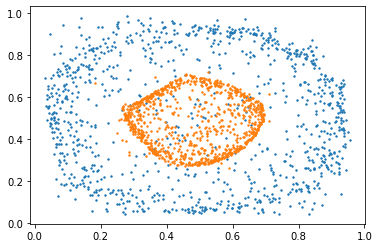

In [30]:
model_student.visualize()

In [31]:
pseudoinput = model_student.encodersampler.trainable_variables[-2:]
df,_,_ = model_student.encodersampler.encoder(pseudoinput)

In [27]:
df

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>